## Classify the MNIST data using SVM

### Download the data and do some basic exploration

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

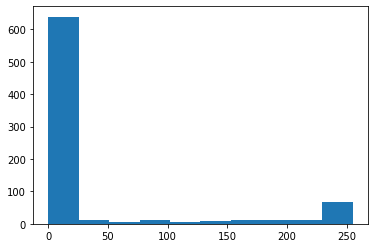

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(mnist.data[0])

In [5]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
mnist.feature_names[::50]

['pixel1',
 'pixel51',
 'pixel101',
 'pixel151',
 'pixel201',
 'pixel251',
 'pixel301',
 'pixel351',
 'pixel401',
 'pixel451',
 'pixel501',
 'pixel551',
 'pixel601',
 'pixel651',
 'pixel701',
 'pixel751']

In [7]:
import numpy as np
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

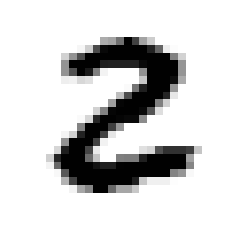

2


In [8]:
import matplotlib as mpl

some_digit = X[25]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()
print(y[25])

### Split the data to train and test sets

In [9]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [10]:
X_train.shape

(60000, 784)

In [11]:
X_test.shape

(10000, 784)

### Fit a linear SVC

#### (scores are on train set until after cross validation)

In [13]:
from sklearn.svm import LinearSVC
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [14]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.89495

### Scale the instances

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(np.float32))
X_train_scaled = X_scaled[:60000]
X_test_scaled = X_scaled[60000:]
#X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
#X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [16]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [17]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9203

### Nonlinear (RBF) SVM 

#### Trained on smaller subset

In [18]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9451333333333334

### Grid search to optimize C and gamma

#### Train on much smaller subset

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=5.565395233233216, gamma=0.003108229570386073 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=5.565395233233216, gamma=0.003108229570386073, total=   0.9s
[CV] C=5.565395233233216, gamma=0.003108229570386073 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .. C=5.565395233233216, gamma=0.003108229570386073, total=   0.9s
[CV] C=5.565395233233216, gamma=0.003108229570386073 .................
[CV] .. C=5.565395233233216, gamma=0.003108229570386073, total=   0.9s
[CV] C=10.602644283886736, gamma=0.029463364998693384 ................
[CV] . C=10.602644283886736, gamma=0.029463364998693384, total=   1.1s
[CV] C=10.602644283886736, gamma=0.029463364998693384 ................
[CV] . C=10.602644283886736, gamma=0.029463364998693384, total=   1.2s
[CV] C=10.602644283886736, gamma=0.029463364998693384 ................
[CV] . C=10.602644283886736, gamma=0.029463364998693384, total=   1.2s
[CV] C=9.62119272994952, gamma=0.0012599895781322502 .................
[CV] .. C=9.62119272994952, gamma=0.0012599895781322502, total=   0.9s
[CV] C=9.62119272994952, gamma=0.0012599895781322502 .................
[CV] .. C=9.62119272994952, gamma=0.0012599895781322502, total=   0.9s
[CV] C=9.62119272994952, gamma=0.0012599895781322502 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   29.6s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000210064483C8>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000210064487C8>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [21]:
rnd_search_cv.best_estimator_

SVC(C=9.62119272994952, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.0012599895781322502, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [22]:
rnd_search_cv.best_score_

0.8619907332482183

#### Now grid search over larger instances subset (takes super long)

In [24]:
#rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

In [25]:
#y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
#accuracy_score(y_train, y_pred)

#### Some googling finds the optimal C and gamma!

In [26]:
svm_clf = SVC(C=5,gamma=0.005)

In [27]:
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9139333333333334

### Score on the test set

In [29]:
y_pred = svm_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9051

### Now let's do the fit on the entire data set

In [30]:
svm_clf.fit(X_train_scaled, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9999666666666667

### Finally, the out of sample score of the full-data-trained SVM

In [32]:
y_pred = svm_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9448

### Well this is not really better than the default RBF. So let's train that on the full data set and see how well it generalizes

In [33]:
svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9865

In [35]:
y_pred = svm_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9663